## Nuclear statement embeddings (X/Y) colored by sentiment

Plots each nuclear statement at its embedding coordinates (`X`, `Y`) and colors points by `nuclear_sentiment`:
- `-1` negative (red)
- `0` neutral/mixed (gray)
- `1` positive (green)


In [1]:
# Parameters
POINT_SIZE = 18
ALPHA = 0.55
FIGSIZE = (9, 7)

DATA_DIR = "../data"
NUCLEAR_CSV = f"{DATA_DIR}/nuclear_mentions_matches.csv"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)


In [3]:
df = pd.read_csv(NUCLEAR_CSV)

required = {"X", "Y", "nuclear_sentiment"}
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns in nuclear_mentions_matches.csv: {missing}")

# Normalize types
for c in ["X", "Y", "nuclear_sentiment"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

sentiment_order = [-1, 0, 1]
df = df[df["nuclear_sentiment"].isin(sentiment_order)].copy()
df = df.dropna(subset=["X", "Y"]).copy()

print("rows:", len(df))
print("sentiment counts:", df["nuclear_sentiment"].value_counts().sort_index().to_dict())

df[["id", "X", "Y", "nuclear_sentiment"]].head()

rows: 319
sentiment counts: {-1: 68, 0: 72, 1: 179}


,id,X,Y,nuclear_sentiment
0,8,1446.703247,430.015778,1
1,179,1421.861450,1090.692383,1
2,182,1331.533325,-308.167847,1
3,191,944.250000,124.001953,-1
4,193,1516.498779,623.805603,1


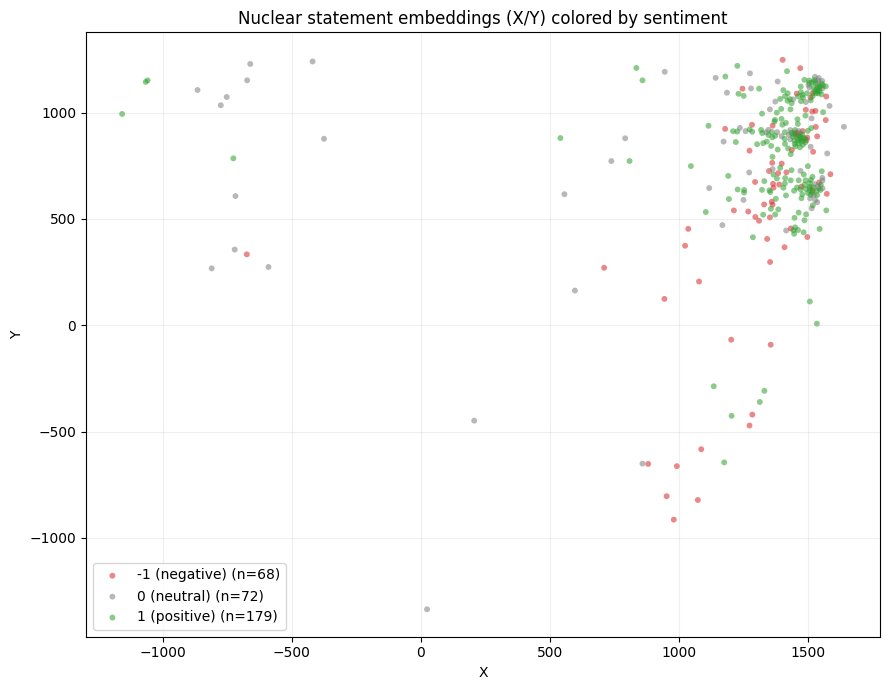

In [4]:
# Scatter plot (colored by sentiment)
colors = {
    -1: "#d62728",  # red
    0: "#7f7f7f",   # gray
    1: "#2ca02c",   # green
}
labels = {
    -1: "-1 (negative)",
    0: "0 (neutral)",
    1: "1 (positive)",
}

fig, ax = plt.subplots(figsize=FIGSIZE)

for s in [-1, 0, 1]:
    d = df[df["nuclear_sentiment"] == s]
    ax.scatter(
        d["X"],
        d["Y"],
        s=POINT_SIZE,
        alpha=ALPHA,
        c=colors[s],
        label=f"{labels[s]} (n={len(d)})",
        edgecolors="none",
    )

ax.set_title("Nuclear statement embeddings (X/Y) colored by sentiment")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend(loc="best")
ax.grid(alpha=0.2)

plt.tight_layout()
plt.show()

In [5]:
# (Optional) Show centroids per sentiment (mean X/Y)
centroids = df.groupby("nuclear_sentiment")[["X", "Y"]].mean().sort_index()
centroids

,X,Y
nuclear_sentiment,,
-1,1309.087292,536.122920
0,1015.705990,790.785894
1,1354.435881,804.591139
